# Lake dynamics

This problem is from Dr. Scott Socolofsky's EFM problem dictionary. 

In this module, we will learn:

- Lake thermal straification, buoyancy frequency

- Heat content and heat flux

- Turbulent diffusivisty

- Richardson number classification for vertical mixing 

- Lake seiche 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data 

# Depth (m)
z = np.array([0., 5., 8., 10., 13., 15., 20., 30., 40., 50.]) 
# Area (m^2)
A = np.array([15., 13.5, 12.8, 12., 11.2, 10.5, 9., 6., 3., 0.]) * 1000.0**2 
# Temperature on June 15 (^oC)
T1 = np.array([18.3, 13.1, 10., 7.3, 6.0, 5.8, 5.4, 5.1, 4.9, 4.8])
# Velocity on June 15 (m/s)
U1 = np.array([0.23, 0.18, 0.11, 0.08, 0.03, -0.02, -0.02, -0.01, -0.01, 0.0])
# Temperature on August 15 (^oC)
T2 = np.array([22.2, 19.1, 12.8, 8.4, 6.4, 5.9, 5.5, 5.3, 5.1, 5.0])
# Velocity on August 15 (m/s)
U2 = np.array([0.12, 0.11, 0.08, 0.05, 0.01, -0.01, -0.005, -0.005, -0.01, 0.0])
# Time difference (days)
dt = 61

## Plot temperature and velocity data

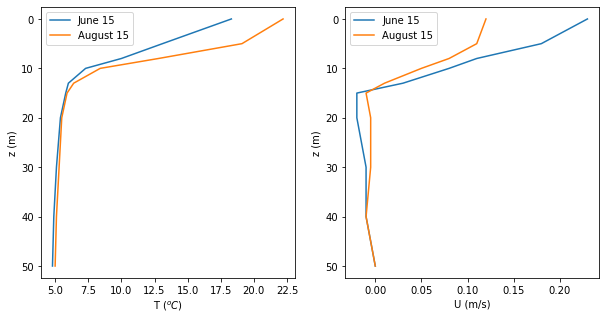

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.plot(T1,z, label = 'June 15')
ax1.plot(T2,z, label = 'August 15')
ax1.invert_yaxis()
ax1.set_xlabel(r'T ($^oC$)')
ax1.set_ylabel(r'z (m)')
ax1.legend()

ax2.plot(U1,z, label = 'June 15')
ax2.plot(U2,z, label = 'August 15')
ax2.invert_yaxis()
ax2.set_xlabel(r'U (m/s)')
ax2.set_ylabel(r'z (m)')
ax2.legend()

## Calculate water properties

In lake dynamics, density of water is an important parameter and its dependence on temperature, salinity and pressure must be considered. Here we use the 'seawater' module of TAMOC (Texas A\&M Oil Spill Calculator) model. Let's borrow its function for water density:

In [4]:
def density(T, S, P):
    """
    Computes the density of seawater from Gill (1982)
    
    Computes the density of seawater. For temperatures less than 40 deg C, this
    function uses the equation of state in Gill (1982), *Ocean-Atmosphere
    Dynamics*, Academic Press, New York; the equations for this code are taken from
    Appendix B in Crounse (2000). For higher temperatures, this function uses the
    equations in Sun et al. (2008), Deep-Sea Research I, Volume 55, pages 1304-1310.
    
    Parameters
    ----------
    T : float
        temperature (K)
    S : float
        salinity (psu)
    P : float
        pressure (Pa)
    
    Returns
    -------
    rho : float
        seawater density (kg/m^3)
    
    """
    if T < 273.15 + 40:
        # Convert T to dec C and P to bar
        T = T - 273.15
        P = P * 1.e-5
    
        # Compute the density at atmospheric pressure
        rho_sw_0 = (
                    999.842594 + 6.793952e-2 * T - 9.095290e-3 * T**2 
                    + 1.001685e-4 * T**3 - 1.120083e-6 * T**4 + 6.536332e-9 * T**5 
                    + 8.24493e-1 * S - 5.72466e-3 * S**(3./2.) + 4.8314e-4 * S**2 
                    - 4.0899e-3 * T*S + 7.6438e-5 * T**2 * S - 8.2467e-7 * T**3 * 
                    S + 5.3875e-9 * T**4 * S + 1.0227e-4 * T * S**(3./2.) 
                    - 1.6546e-6 * T**2 * S**(3./2.)
                    )
    
        # Compute the pressure correction coefficient
        K = (
             19652.21 + 148.4206 * T - 2.327105 * T**2 + 1.360477e-2 * T**3 
             - 5.155288e-5 * T**4 + 3.239908 * P + 1.43713e-3 * T * P 
             + 1.16092e-4 * T**2 * P - 5.77905e-7 * T**3 * P 
             + 8.50935e-5 * P**2 - 6.12293e-6 * T * P**2 
             + 5.2787e-8 * T**2 * P**2 + 54.6746 * S - 0.603459 * T * S 
             + 1.09987e-2 * T**2 * S - 6.1670e-5 * T**3 * S 
             + 7.944e-2 * S**(3./2.) + 1.64833e-2 * T * S**(3./2.) 
             - 5.3009e-4 * T**2 * S**(3./2.) + 2.2838e-3 * P * S 
             - 1.0981e-5 * T * P * S - 1.6078e-6 * T**2 * P * S 
             + 1.91075e-4 * P * S**(3./2.) - 9.9348e-7 * P**2 * S 
             + 2.0816e-8 * T * P**2 * S + 9.1697e-10 * T**2 * P**2 * S
             )
        
        rho = rho_sw_0 / (1 - P / K)
    
    else:
        # Convert T to deg C and P to MPa
        T = T - 273.15
        P = P / 1.e6
        
        # Summations
        left_col = 9.9920571e2 + 9.5390097e-2 * T - 7.6186636e-3 * T**2 + \
            3.1305828e-5 * T**3 - 6.1737704e-8  * T**4 + 4.3368858e-1 * P + \
            2.5495667e-5 * P*T**2 - 2.8988021e-7 * P*T**3 + \
            9.5784313e-10 * P*T**4 + 1.7627497e-3 * P**2 - 1.2312703e-4 * P**2*T \
            + 1.3659381e-6 * P**2*T**2 + 4.0454583e-9 * P**2*T**3 - 1.4673241e-5 \
            * P**3 + 8.8391585e-7 * P**3*T - 1.1021321e-9 * P**3*T**2 + \
            4.2472611e-11 * P**3*T**3 - 3.9591772e-14 * P**3*T**4
        right_col = -7.99992230e-1 * S + 2.40936500e-3 * S*T - 2.58052775e-5 * \
            S*T**2 + 6.85608405e-8 * S*T**3 + 6.29761106e-4 * P*S - \
            9.36263713e-7 * P**2*S
        
        rho = left_col - right_col
    
    return rho

In [34]:
# Water properties in the lake 

cp = 3997.4     # J/(kg K)
T = 13# np.mean(T1) # mean temperature 
S = 0.0         # Salinity 
P = 101325.0    # Pressure

# use above function to calculate mean water density
rho = density(T+273.15, S, P)
print(rho)

999.4269322458301


In [46]:
rhoh = 1000.1
rhoe = 999.3
he = 3
hh = 30
g = 9.81
L = 10000
t  = 2*L/(g*(rhoh-rhoe)/(rhoh/hh+rhoe/he))**0.5
print(t/3600)

37.96185794092569


## Calculate heat content in the lake at these two different dates and the mean heat flux from atmosphere in this period

Total heat content:

H = $\int^h_0 \rho c_p T(z) A(z) dz$

where $h$ is lake depth, $c_p$ is heat capacity at constant pressure, $A$ is lake area, and $T$ is temperature. Here, $A$ and $T$ are function of $z$. We can assume depth variations in $c_p$ and $\rho$ are small.

We can use trapezoidal rule to do numerical integration from the data points.

In [157]:
dz = z[1:] - z[:-1] 
# Convert temperature to Kelvin
T1_in_K = T1 + 273.15
T2_in_K = T2 + 273.15

# Hand calculation of integration
# Heat content on June 15
H1 = np.sum( rho * cp * (T1_in_K[:-1]*A[:-1] + T1_in_K[1:]*A[1:])/2 * dz )
# Heat content on August 15
H2 = np.sum( rho * cp * (T2_in_K[:-1]*A[:-1] + T2_in_K[1:]*A[1:])/2 * dz )

# Using a package to calculate integration
from scipy import integrate 
H11 = integrate.cumtrapz(T1_in_K*A*rho*cp, z, initial=0)
H22 = integrate.cumtrapz(T2_in_K*A*rho*cp, z, initial=0)

In [158]:
# mean heat flux in J/s = W, then convert to kW
H_dot = (H2-H1)/(dt*24*3600)/1000
print('Mean heat flux is', H_dot, 'kW')
H_dot = (H22[-1]-H11[-1])/(dt*24*3600)/1000
print('Mean heat flux is', H_dot, 'kW')

Mean heat flux is 479658.3860388221 kW
Mean heat flux is 479658.3860388343 kW


## Calculate vertical diffusivity at each depth

The ratio of turbulent diffusivity to turbulent viscosity can be estimated from the ratio of molecular diffusivity and viscosity: 

$\frac{D_t}{\nu_t} \approx \frac{D}{\nu}$

Similarlly, the raito of turbulent viscosity to molecluar viscosity can be related to thermal diffusivity. 

$\frac{\nu_t}{\nu} \approx \frac{\alpha_t}{\alpha}$

where the turbulent thermal diffusivity can be obtained from the heat flux measurements.

The molecular thermal diffusivity can be estimated from the given thermal conducitivity:

$\alpha = \frac{k}{\rho c_p}$

where $k = 0.6$ W/mK is the thermal conductivity.

Calculation of turbulent diffusivity follows the heat flux equation:

The total heat flux into the lake during this time period is related to the temperature gradient (heat equation):

$\dot{H} = \alpha_t A \rho c_p \nabla T$ where $\nabla T = dT/dz$ in one-dimensional problem here.

So that we can obtain turbulent thermal diffusivity $\alpha_t$:

$D_t = D \frac{\alpha_t}{\alpha}$

where molecular diffusivity and thermal diffusivity are known. 

Text(0, 0.5, 'z (m)')

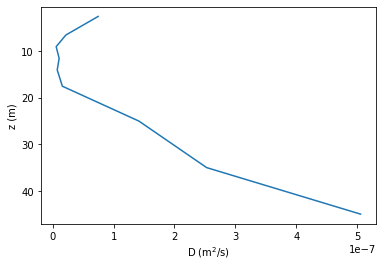

In [159]:
# Heat content on June 15 at each depth, (J)
H1 = rho * cp * (T1_in_K[:-1]*A[:-1] + T1_in_K[1:]*A[1:])/2 * dz 
# Heat content on August 15 at each depth, (J)
H2 = rho * cp * (T2_in_K[:-1]*A[:-1] + T2_in_K[1:]*A[1:])/2 * dz 

# Heat flux, (J/s)
H_dot = (H2 - H1)/(dt*24*3600)

# Vertical temperature gradient, K/m
dT1dz = (T1_in_K[1:] - T1_in_K[:-1]) / (-dz)
dT2dz = (T2_in_K[1:] - T2_in_K[:-1]) / (-dz)
# take mean value 
dTdz = (dT1dz + dT2dz) / 2.0

# vertical heat content gradient, J/m^4
dCdz = cp * rho * dTdz

# Area of lake in the mid-point, m^2
A_mid = (A[1:] + A[:-1]) / 2.0

# thermal diffusivity, m^2/s
alpha_t = H_dot / (A_mid * dCdz)

# molecular diffusivities, m^2/s
alpha = 0.6 / (cp * rho)
D = 2e-9

# Turbulent diffusivity, m^2/s
D_t = D * alpha_t / alpha

# Plot the figure 
z_mid = (z[1:] + z[:-1]) / 2.0
plt.plot(D_t, z_mid)
plt.gca().invert_yaxis()
plt.xlabel(r'D (m$^2$/s)')
plt.ylabel(r'z (m)')

From this result, we can see the smallest diffusivity occurs close to the layer of most temperature gradient. This shows how stratification prevents vertical mixing in the lake. 

## Calculate buoyancy frequency 

$N = \sqrt{\left( -\frac{g}{\rho}\frac{\partial \rho}{\partial z} \right)}$

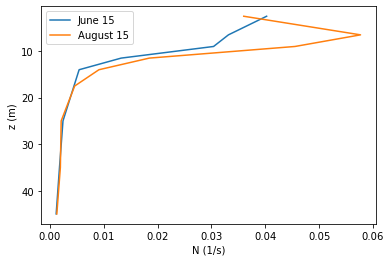

In [160]:
rho1 = np.zeros(len(T1))
rho2 = np.zeros(len(T2))

# calculate water density at each depth
for i in range(len(rho1)):
    rho1[i] = density(T1_in_K[i], S, P)
    
for i in range(len(rho2)):
    rho2[i] = density(T2_in_K[i], S, P)

g = 9.81
# buoyancy frequency
N1 = np.sqrt(g / rho * (rho1[1:] - rho1[:-1]) / dz)
N2 = np.sqrt(g / rho * (rho2[1:] - rho2[:-1]) / dz) 

plt.plot(N1, z_mid, label = 'June 15')
plt.plot(N2, z_mid, label = 'August 15')
plt.gca().invert_yaxis()
plt.xlabel(r'N (1/s)')
plt.ylabel(r'z (m)')
plt.legend()

## Calculate Richardson number

$Ri = N^2/\left(\frac{\partial U}{\partial z}\right)^2$

/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_63270/618606231.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Ri1 = N1**2 / ((U1[1:] - U1[:-1]) / dz)**2
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_63270/618606231.py:2: RuntimeWarning: divide by zero encountered in true_divide
  Ri2 = N1**2 / ((U2[1:] - U2[:-1]) / dz)**2


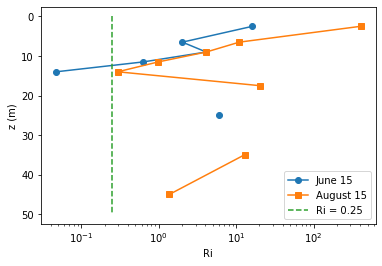

In [161]:
Ri1 = N1**2 / ((U1[1:] - U1[:-1]) / dz)**2
Ri2 = N1**2 / ((U2[1:] - U2[:-1]) / dz)**2

plt.plot(Ri1, z_mid,'o-', label = 'June 15')
plt.plot(Ri2, z_mid,'s-', label = 'August 15')
plt.plot([0.25, 0.25],[0,50],'--', label='Ri = 0.25')
plt.gca().invert_yaxis()
plt.xlabel('Ri')
plt.ylabel('z (m)')
plt.legend()
plt.xscale('log')

## Estimate the maximal allowed wind speed that does not cause mixing in the lake

The lake mixing claasification using a two-layer Richardson number (Fisher et al. (1979)):

$Ri_* = \frac{g(\rho_h-\rho_e)}{\bar{\rho}}\frac{\bar{h}}{u_*^2} > \frac{L^2}{(2h)^2}$ classifies non-mixing: The deepening process proceeds very slowly by turbulent erosion.

$L/(2h) < Ri < (L/(2h))^2$: mid-thermocline mixing: Internal waves are the prominant feature of this regime.

$1 < Ri < L/(2h)$: Throughout this regime the thermocline will be diffuse and steeply inclined.

$Ri < 1$: Deepening is now so rapid and chaotic that the interface will not be well defined.

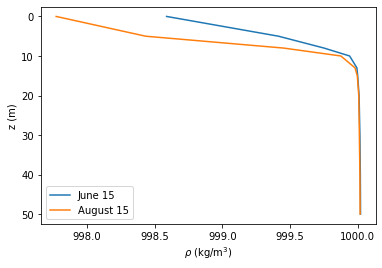

In [162]:
plt.plot(rho1,z, label = 'June 15')
plt.plot(rho2,z, label = 'August 15')
plt.gca().invert_yaxis()
plt.xlabel(r'$\rho$ (kg/m$^3$)')
plt.ylabel('z (m)')
plt.legend()

In [168]:
# June 15
rho_h = max(rho1)
h_e = 5 # epilimnion depth
rho_e = np.mean(rho1[z<2*h_e])
rho_m = np.mean(rho1)
print('rho_e=', rho_e, 'kg/m^3')
print('rho_m=', rho_m, 'kg/m^3')
print('rho_h=', rho_h, 'kg/m^3')

rho_e= 999.2510071973628 kg/m^3
rho_m= 999.7744346770289 kg/m^3
rho_h= 1000.0195241091436 kg/m^3


In [169]:
# Lake size and depth
L = 8000
h = max(z)

In [170]:
# citical shear stress
u_star = np.sqrt(g * (rho_h - rho_e)/rho_m * h_e / (L**2/(2*h)**2))
print('The allowed maximal shear stress = ', u_star, 'm/s')

The allowed maximal shear stress =  0.002427198079070358 m/s


In [171]:
# calculate wind speed at 10 m 

rho_a = 1.2 # air density
Cd = 0.013  # drag coefficient
U10 = u_star / np.sqrt(Cd * rho_a/rho_m)
print('The allowed maximal wind speed = ', U10, 'm/s')

The allowed maximal wind speed =  0.6144604493851984 m/s


In [172]:
# Repeat the above process for August 15
rho_h = max(rho2)
h_e = 5 # epilimnion depth
rho_e = np.mean(rho2[z<2*h_e])
rho_m = np.mean(rho2)
print('rho_e=', rho_e, 'kg/m^3')
print('rho_m=', rho_m, 'kg/m^3')
print('rho_h=', rho_h, 'kg/m^3')
u_star = np.sqrt(g * (rho_h - rho_e)/rho_m * h_e / (L**2/(2*h)**2))
print('The allowed maximal shear stress = ', u_star, 'm/s')
U10 = u_star / np.sqrt(Cd * rho_a/rho_m)
print('The allowed maximal wind speed = ', U10, 'm/s')

rho_e= 998.5532855550332 kg/m^3
rho_m= 999.5557464192625 kg/m^3
rho_h= 1000.0165645599483 kg/m^3
The allowed maximal shear stress =  0.0033495740201656796 m/s
The allowed maximal wind speed =  0.8478729702193911 m/s


As you can see, on August 15, the lake is a bit more stratified, so that the allowed maximal wind speed is a bit larger to maintain the stable condition. 

When a storm with $U_{10} = 20$ m/s passed over the lake, let's calcualte the mixing classification.  

In [181]:
U10 = 20
ustar = U10 * np.sqrt(Cd * rho_a/rho_m)
Ri_star = g/rho_m * (rho_h - rho_e) * h_e / ustar**2
print('Ri_* = ', Ri_star)
print('L^2/(2h)^2 = ', (L/(2*h))**2)
print('L/(2h) = ', L/(2*h))

Ri_* =  11.502217178058439
L^2/(2h)^2 =  6400.0
L/(2h) =  80.0


Based on this result, We found $1<Ri_*<L/(2h)$. This indicate that the thermocline will be diffuse and steeply inclined. Hence, a different type of temperature profile should be expected. 

## Calculate lake seiche using two-layer method

$T_{\textrm{seiche}} = \frac{2L}{\sqrt{g^{\prime}\frac{h_1h_2}{h_1+h_2}}}$

where $h_1$ is the epilimnion depth, and $h_2 = h-h_1$.

In [175]:
h1 = h_e
h2 = h - h1
gp = g * np.abs(g * (rho_h - rho_e)/rho_m)
T = 2*L/np.sqrt(gp*(h1*h2/(h1+h2)))
print('Lake seiche = ', T/3600/24, 'days')

Lake seiche =  0.23257922302207135 days
